目标检测之YOLO V2
===

# 1.网络结构

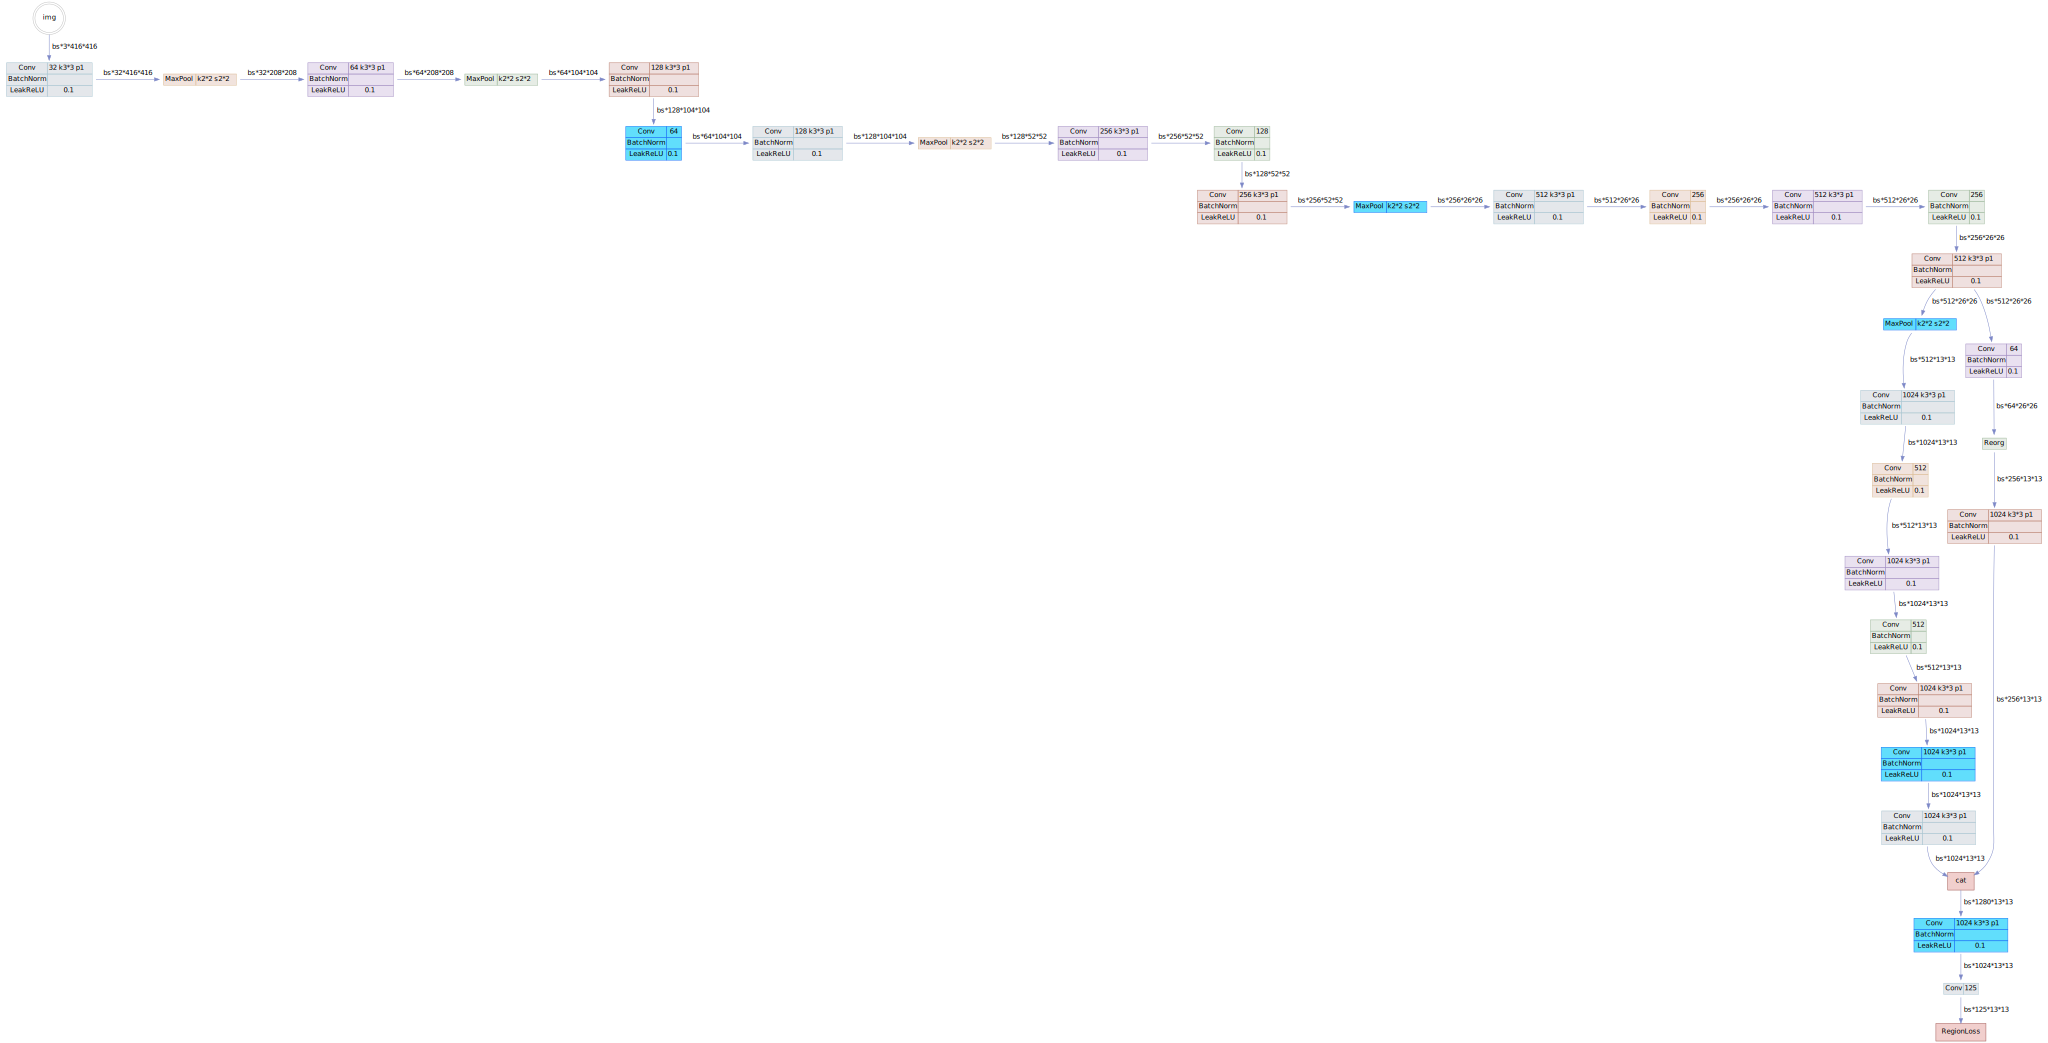

In [1]:
import graphviz

FONT_NAME = "Fira Code Retina"
graph = graphviz.Digraph(name="YOLOV2", format='png',node_attr={'shape': 'plaintext'})
graph.node('img', shape="doublecircle", color="grey", fontname=FONT_NAME)

with graph.subgraph() as s:
    s.attr(rank="same")
    s.node('block0', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>Conv</td><td>32 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block1', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block2', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>64 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block3', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block4', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.edge("block0", "block1", color="#7D88C7", label="bs*32*416*416", fontname=FONT_NAME)
    s.edge("block1", "block2", color="#7D88C7", label="bs*32*208*208", fontname=FONT_NAME)
    s.edge("block2", "block3", color="#7D88C7", label="bs*64*208*208", fontname=FONT_NAME)
    s.edge("block3", "block4", color="#7D88C7", label="bs*64*104*104", fontname=FONT_NAME)

with graph.subgraph() as s:
    s.attr(rank="same")
    s.node('block5', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                <tr><td>Conv</td><td>64</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block6', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>Conv</td><td>128 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block7', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block8', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block9', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>Conv</td><td>128</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.edge("block5", "block6", color="#7D88C7", label="bs*64*104*104", fontname=FONT_NAME)
    s.edge("block6", "block7", color="#7D88C7", label="bs*128*104*104", fontname=FONT_NAME)
    s.edge("block7", "block8", color="#7D88C7", label="bs*128*52*52", fontname=FONT_NAME)
    s.edge("block8", "block9", color="#7D88C7", label="bs*256*52*52", fontname=FONT_NAME)

graph.edge("block4", "block5", color="#7D88C7", label="bs*128*104*104", fontname=FONT_NAME)

with graph.subgraph() as s:
    s.attr(rank="same")
    s.node('block10', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
                <tr><td>Conv</td><td>256 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block11', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
                <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block12', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block13', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
                <tr><td>Conv</td><td>256</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block14', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
                <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)
    s.node('block15', '''<
                <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
                <tr><td>Conv</td><td>256</td></tr>
                <tr><td>BatchNorm</td><td></td></tr>
                <tr><td>LeakReLU</td><td>0.1</td></tr>
                </table>
                >''', fontname=FONT_NAME)

    s.edge("block10", "block11", color="#7D88C7", label="bs*256*52*52", fontname=FONT_NAME)
    s.edge("block11", "block12", color="#7D88C7", label="bs*256*26*26", fontname=FONT_NAME)
    s.edge("block12", "block13", color="#7D88C7", label="bs*512*26*26", fontname=FONT_NAME)
    s.edge("block13", "block14", color="#7D88C7", label="bs*256*26*26", fontname=FONT_NAME)
    s.edge("block14", "block15", color="#7D88C7", label="bs*512*26*26", fontname=FONT_NAME)

graph.edge("block9", "block10",  color="#7D88C7", label="bs*128*52*52", fontname=FONT_NAME)

graph.node('block16', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
            <tr><td>Conv</td><td>512 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block17', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
            <tr><td>MaxPool</td><td>k2*2 s2*2</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block18', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block19', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#F1E3DD" color="#DDBF9A">
            <tr><td>Conv</td><td>512</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block20', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block21', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
            <tr><td>Conv</td><td>512</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block22', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block23', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block24', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block25', shape="box",color="#A25954",style="filled",fillcolor="#F1CFCD",label="cat", fontname=FONT_NAME)
graph.node('block26', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E9E1F0" color="#A592C5">
            <tr><td>Conv</td><td>64</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block27', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E6ECE5" color="#A2BBA0">
            <tr><td>Reorg</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block28', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#EFE0DF" color="#C08B7B">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block29', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#61DEFC" color="#2075F8">
            <tr><td>Conv</td><td>1024 k3*3 p1</td></tr>
            <tr><td>BatchNorm</td><td></td></tr>
            <tr><td>LeakReLU</td><td>0.1</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block30', '''<
            <table border="0" CELLBORDER="1" CELLSPACING="0" bgcolor="#E4E7EB" color="#ACC7D2">
            <tr><td>Conv</td><td>125</td></tr>
            </table>
            >''', fontname=FONT_NAME)
graph.node('block31', shape="box",color="#A25954",style="filled",fillcolor="#F1CFCD",label="RegionLoss", fontname=FONT_NAME)

graph.edge("img", "block0", color="#7D88C7", label="bs*3*416*416", fontname=FONT_NAME)

graph.edge("block15", "block16", color="#7D88C7", label="bs*256*26*26", fontname=FONT_NAME)
graph.edge("block16", "block17", color="#7D88C7", label="bs*512*26*26", fontname=FONT_NAME)
graph.edge("block17", "block18", color="#7D88C7", label="bs*512*13*13", fontname=FONT_NAME)
graph.edge("block18", "block19", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)
graph.edge("block19", "block20", color="#7D88C7", label="bs*512*13*13", fontname=FONT_NAME)

graph.edge("block20", "block21", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)
graph.edge("block21", "block22", color="#7D88C7", label="bs*512*13*13", fontname=FONT_NAME)
graph.edge("block22", "block23", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)
graph.edge("block23", "block24", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)
graph.edge("block24", "block25", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)

graph.edge("block16", "block26", color="#7D88C7", label="bs*512*26*26", fontname=FONT_NAME)
graph.edge("block26", "block27", color="#7D88C7", label="bs*64*26*26", fontname=FONT_NAME)
graph.edge("block27", "block28", color="#7D88C7", label="bs*256*13*13", fontname=FONT_NAME)
graph.edge("block28", "block25", color="#7D88C7", label="bs*256*13*13", fontname=FONT_NAME)

graph.edge("block25", "block29", color="#7D88C7", label="bs*1280*13*13", fontname=FONT_NAME)
graph.edge("block29", "block30", color="#7D88C7", label="bs*1024*13*13", fontname=FONT_NAME)
graph.edge("block30", "block31", color="#7D88C7", label="bs*125*13*13", fontname=FONT_NAME)

graph

# 3.YoLoV2 未完
YoLoV1相对于Fast R-CNN，YOLO在目标定位方面错误率较高，YoLoV2的改进集中于在保持分类准确率的基础上增强定位精确度

## 3.1.YOLOV2的改进
### 3.1.1.全新网络Darknet-19
YOLOv2采用了全新的Darknet-19网络，将YOLOv1中最后的全连接层换成了卷积层。最后的特征图大小为$13 \times 13$.输入为$416 \times 416$

### 3.1.2.Anchors Box
采纳了Faster RCNN中的anchors box的思想，每个位置的各个anchor box都单独预测一套分类概率。anchors box数量为5。为何要引入anchors呢，因为在anchors上微调比直接去回归坐标要容易得多。

## 3.2.损失函数
YOLOv2的损失函数比YOLOv1的更复杂。
$$\begin{eqnarray}
Loss_t=\sum_{i=0}^W\sum_{j=0}^H\sum_{k=0}^A& &1_{MaxIOU \le Thresh}\lambda_{noobj} \times (-b_{ijk}^o)^2\\
&+&1_{t \le 12800}\lambda_{prior} \times \sum_{r \in (x,y,W,h)}(prior_k^r-b_{ijk}^r)^2 \\
&+&1_k^{truth}[\lambda_{coord} \times \sum_{r \in (x,y,W,h)}(truth^r-b_{ijk}^r)^2]\\
&+&1_k^{truth}[\lambda_{obj} \times (IOU_{truth}^k-b_{ijk}^o)^2]\\
&+&1_k^{truth}[\lambda_{class} \times \sum_{c=1}^C(truth^c-b_{ijk}^c)^2]
\end{eqnarray}$$

## 3.3.损失函数释义
$W,H$分别指的是特征图的宽和高，分别是13,13，A指的是先验框的数目5。

### 3.3.1.第一项
$$1_{MaxIOU \le Thresh}\lambda_{noobj} \times (-b_{ijk}^o)^2$$
loss是计算background的置信度误差，判断是否是用来预测背景的逻辑就是$1_{MaxIOU \le Thresh}$。需要先计算各个预测框和所有ground truth的IOU值，并且取最大值Max_IOU，如果该值小于一定的阈值(0.6)，那么这个预测框就标记为background，需要计算noobj的置信度误差

### 3.3.2.第二项
计算先验框与预测宽的坐标误差，但是只在前12800上计算，这项应该是在训练前期使预测框快速学习到先验框的形状。

### 3.3.3.第三项
计算与某个ground truth匹配的预测框各部分的坐标误差

### 3.3.4.第四项
计算与某个ground truth匹配的预测框各部分的置信度误差

### 3.3.5.第五项
计算与某个ground truth匹配的预测框各部分的分类误差
